### Lab9. EDA on Cardiovascular Data
### Import necessary packages

In [1]:
## import all required modules
import csv
import numpy as np 
import pandas as pd 
# Import plotting modules
import seaborn as sns
from matplotlib import pyplot as plt
# Disable warnings
import warnings
warnings.filterwarnings('ignore')
# import statistical modul

### Import dataset into DataFrame

In [2]:
df = pd.read_csv("mlbootcamp5_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
df.describe

<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

     

In [5]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Print the size

In [9]:
df.shape

(70000, 13)

### Count Values
#### How many people smoke?

In [10]:
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

#### How many people consume alcohol?

In [11]:
df.alco.value_counts()

0    66236
1     3764
Name: alco, dtype: int64

#### What are the difference glucose levels?

In [12]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

#### Draw bar chart for smoke column

<AxesSubplot:xlabel='smoke', ylabel='count'>

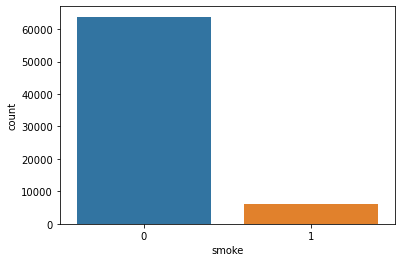

In [13]:
sns.countplot(x='smoke',data=df)

#### Draw 4 count plots for gender, smoke, alco and active columns respectively in 1 row, 4 columns

In [14]:
# First extract all 4 columns into a dataframe, binary_df
binary_df = df[['gender','smoke','alco','active']]

Then, plot count plots

<AxesSubplot:xlabel='variable', ylabel='count'>

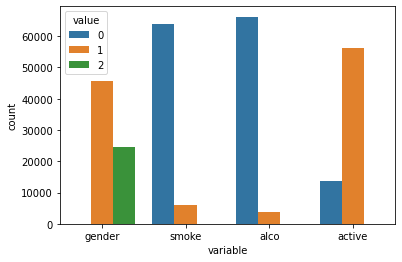

In [15]:
sns.countplot(x="variable", hue="value",data=pd.melt(binary_df))

#### Draw a count plot for cholesterol and gluc columns

<AxesSubplot:xlabel='variable', ylabel='count'>

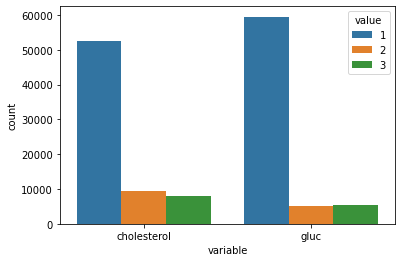

In [16]:
df1 = df[['cholesterol','gluc']]
sns.countplot(x="variable", hue='value', data = pd.melt(df1))

### Plot Data Distribution
#### Show the distribution of age values as histogram 

<AxesSubplot:xlabel='age', ylabel='Density'>

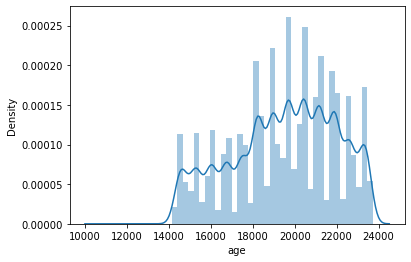

In [17]:
sns.distplot(df['age'])

#### Show the distribution of age, height and weight values as 3 histograms in one plot

<AxesSubplot:xlabel='weight', ylabel='Density'>

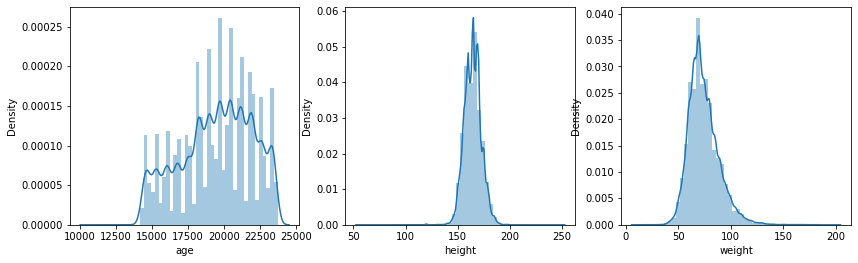

In [18]:
x_ag = df['age']
y_he = df['height']
z_we = df['weight']

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
sns.distplot(x_ag,ax=axes[0],axlabel='age')
sns.distplot(y_he,ax=axes[1],axlabel='height')
sns.distplot(z_we,ax=axes[2],axlabel='weight')

### Calculate Summary Statistics Using Pandas
#### 1. How many men and women are present in this dataset?

In [19]:
df.gender.value_counts()    #Now, count gender column

1    45530
2    24470
Name: gender, dtype: int64

But, we do not know if 1 means male or female. Similarly, 2 means male or female. We need to somehow find it
out. How to do that?. When we inspect other columns, we can find out that there is a column "height" in
centimeters. So, we can assume that men are more taller than women, generally.

So, we can compute the average height for gender=1 and gender=2. The largest average value will denote
"male".

In [20]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

161 cm and almost 170 cm on average, so we make a conclusion that gender=1 represents females, and
gender=2 – males.

Therefore, looking at the value_counts() of gender column, we can conclude that the dataset contains 45530
women and 24470 men.

#### 2. Which gender more often reports consuming alcohol - men or women?

In [21]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Here, larger value is 2, which denotes men
#### 3. Which gender is more physically active - men or women?

In [22]:
df.groupby('gender')['active'].mean()

gender
1    0.802021
2    0.806906
Name: active, dtype: float64

Here, larger values denotes 2, so answer is men
#### 4. What is the the rounded difference between the percentages of smokers among men and women(rounded)?
First, let us find who smokes more.

In [23]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

So, men smokes more tha women. Now, let us find out what percentage men smokes more than women

In [24]:
round((df[df['smoke']==0]['age'].median() - df[df['smoke']==1]['age'].median())/30)

20

#### 5. What is the difference between median values of age for smokers and non-smokers (in months,rounded)? You'll need to figure out the units of feature age in this dataset.
In the dataset, age is given in terms of days. Therefore, you should divide by 365 to convert age into years. First,
find the median age in years of smoke category.

In [28]:
df['yearly'] = df['age'].apply(lambda x : x/365.25)
temp1 = df.groupby('smoke')
temp1['yearly'].median()

smoke
0    53.995893
1    52.361396
Name: yearly, dtype: float64

Median age of smokers is 52.4 years, for non-smokers it's 54. We see that the correct answer is 20 months.

Now, subtract the median age to find out the difference.

In [29]:
(df[df['smoke']==0]['yearly'].median()-df[df['smoke']==1]['yearly'].median())*12

19.61396303901438

### Perform Risk Analysis

Calculate a new feature, age_years

The age variable represents age in days. You need to transform each age into years rounded as integer and
store in new column, age_years

In [30]:
df.age

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [32]:
age_yea = []
b = 365
for i in df.age:
    c = i//b
    age_yea.append(c)
len(age_yea)

70000

In [33]:
df['age_years']=age_yea

#### Check age_years column using head()

In [34]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yearly,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205,47


### What is maximum age_years?

In [35]:
df['age_years'].max()

64

### What is minimum age_years?

In [36]:
df['age_years'].min()

29

#### Risk Factors for Cardio Vascular Discese
    Men who are 50 and above 
    Men who are smokers 
    Men whose cholesterol level > 1 
    Men whose systolic pressure is from 160 to 180 (both inclusive)

### How many risky men are in the dataset?
#### How many people who are 50 and above?

In [37]:
xy50 = df[df['age_years']>=50]

In [38]:
xy50.age_years.count()

48591

In [39]:
df['df_old'] = df['age_years']
df.loc[df.age_years>=50,'df_old']=True
df.loc[df.age_years<50,'df_old']=False

In [40]:
# Show its head()
df['df_old'].head()

0     True
1     True
2     True
3    False
4    False
Name: df_old, dtype: object

In [41]:
df.df_old.value_counts()

True     48591
False    21409
Name: df_old, dtype: int64

#### Now, count its unique values

Therefore, there are 48591 people who are 50 years and above

#### How many are 50 years and above and men and smokers?

In [42]:
df_smoke_old_men = df_smoke_old_men=df.loc[(df.gender==2) & (df.smoke ==1) & (df.age_years>=50)]

In [43]:
df_smoke_old_men.head()     # prit top-5 from df_smoke_old_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yearly,age_years,df_old
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,59.561944,59,True
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64.032854,64,True
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,60.503765,60,True
105,140,20627,2,168,78.0,140,90,2,1,1,0,1,1,56.473648,56,True
121,166,19507,2,174,77.0,120,80,1,1,1,0,1,1,53.407255,53,True


#### How many old men have their cholesterol level > 1 and systolic pressure is from 160 to 180 too ?

In [44]:
 risky_men = risky_men=df_smoke_old_men[(df_smoke_old_men.cholesterol == 1) & (df_smoke_old_men.ap_hi >=160) & (df_smoke_old_men.ap_hi <= 180)]

In [45]:
risky_men.head()   # Print its head

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yearly,age_years,df_old
697,986,22615,2,171,108.0,161,73,1,1,1,0,1,1,61.916496,61,True
1434,2014,21143,2,169,85.0,180,100,1,1,1,1,0,0,57.886379,57,True
2693,3799,21906,2,170,94.0,160,90,1,1,1,1,1,0,59.975359,60,True
3093,4362,18755,2,185,108.0,160,90,1,1,1,0,1,1,51.348392,51,True
3116,4396,19631,2,173,79.0,160,100,1,1,1,0,1,0,53.746749,53,True


#### What is the size of risky_men ?

In [46]:
risky_men.shape

(173, 16)

Therefore, ther are 136 risky men are in the dataset
### How many risky men have cardiovascular discese out of these 136 samples?

In [47]:
risky_men.cardio.value_counts()

1    153
0     20
Name: cardio, dtype: int64

### Compute Body Mass Index
Create a new feature – BMI. To do this, divide weight in kilogramms by the square of the height in meters.
Normal BMI values are said to be from 18.5 to 25.

In our dataset, height is in centimeters. So, while you are computing BMI, you have to convert into meters by
dividing it by 100

#### Create a column bmi and store the bmi values

In [48]:
df['height'] = df['height'].apply(lambda x:x/100)

In [49]:
df['bmi'] = df.apply(lambda x : x.weight/(x.height*x.height),axis=1)

In [50]:
 df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yearly,age_years,df_old,bmi
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,50.357290,50,True,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,55.381246,55,True,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,51.627652,51,True,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,48.249144,48,False,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,47.841205,47,False,23.011177


#### How many people have ideal BMI values?
We already know that ideal BMI values are said to be from 18.5 to 25.

Compute ideal bmi values using bmi column and store the result in a new column, ideal_bmi

In [51]:
ideal_bmi = df[(df.bmi>18.5) & (df.bmi>25)]

In [52]:
ideal_bmi.shape

(43546, 17)

25804 people have ideal BMI values

#### Draw catplot between gender and bmi values

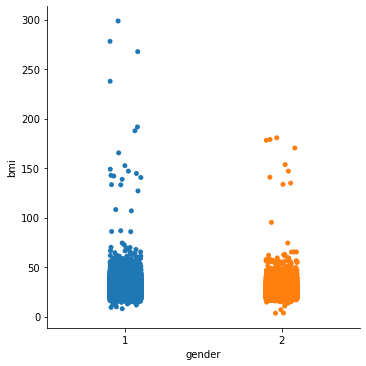

In [53]:
sns.catplot(x='gender',y='bmi',data=df)

#### Looking at catplot, is BMI of male is larger than BMI of female (we know 1-female, 2-male already) ?

From the plot, we can conclude Female bmi is greater than Male bmi

#### Is median value of Men's BMI is higher then women's BMI?

Compute median bmi for gender

In [54]:
df.groupby('gender')['bmi'].median()

gender
1    26.709402
2    25.910684
Name: bmi, dtype: float64

From the above values, we conclude that Female have higher BMI values than male

#### Consider the output of the following query and answer the questions

In [55]:
 df.groupby(['gender', 'alco', 'cardio'])['bmi'].median().to_frame()

bmi
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

#### Is it true?. Healthy people have, on average, a higher BMI than the people with CVD.

#### Is it true?. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

### Data Cleaning

Remove the following people, that we consider to have erroneous data, from the dataset
- diastilic pressure is higher then systolic 
- height is strictly less than 2.5%-percentile 
- height is strictly more than 97.5%-percentile 
- weight is strictly less then 2.5%-percentile 
- weight is strictly more than 97.5%-percentile

Here, we will retain those records which do not satisfy the above conditions

In [56]:
# ap_hi = systolic
# ap_lo = diastolic

In [57]:
#filtered_df = pd.read_csv("mlbootcamp5_train.csv", sep=';')

In [58]:
#filtered_df.drop(filtered_df[filtered_df.ap_lo > filtered_df.ap_hi].index, axis=0, inplace= True)

In [59]:
#filtered_df.drop(filtered_df[(filtered_df.height < 2.5)|(filtered_df.height > 97.5)].index, axis=0, inplace= True)

In [60]:
#filtered_df.drop(filtered_df[(filtered_df.weight < 2.5)|(filtered_df.weight > 97.5)].index, axis=0, inplace= True)#

In [61]:
#print(filtered_df.shape[0] / df.shape[0])

#### So, what percentage of people do you remove from dataset?
### Visual Data Analytics
### Correlation matrix visualization

To understand the features better, you can create a matrix of the correlation coefficients between the features.
Use the initial dataset (non-filtered).

Plot a correlation matrix using heatmap().

<AxesSubplot:>

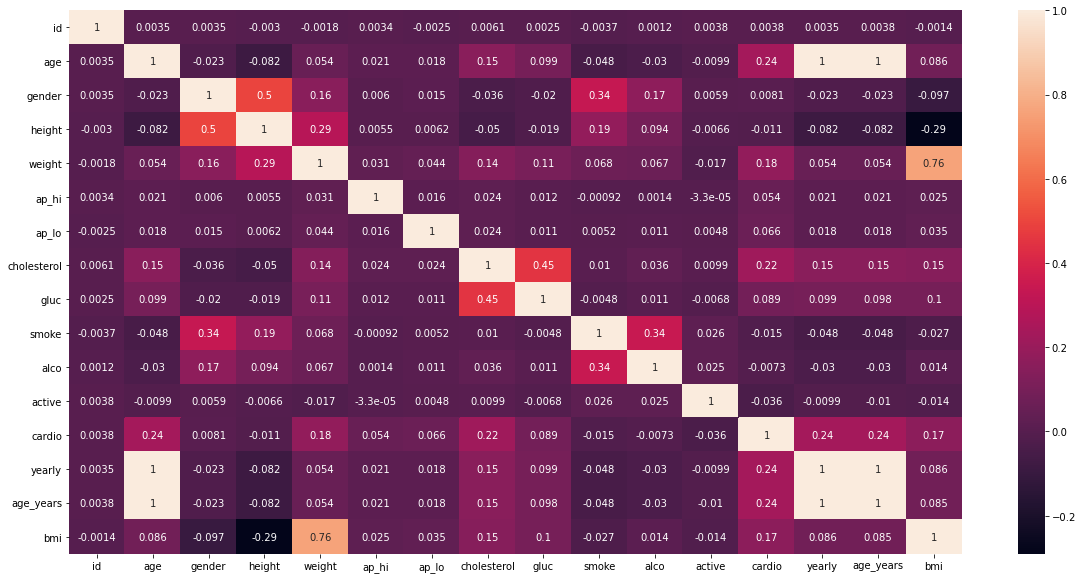

In [62]:
plt.figure(figsize = (20,10))
cor=df.corr()
sns.heatmap(cor,annot=True)

#### From the Heatmap, find out top two features that have strongest Pearson's correlation with the gender feature.

In [64]:
cor_target = abs(cor["gender"])

relevant_fea = cor_target[cor_target>0.4]
relevant_fea

gender    1.000000
height    0.499033
Name: gender, dtype: float64

#### In the Heatmap, which feature strongly correlates to weight?

In [65]:
cor_target = abs(cor["weight"])

relevant_fea = cor_target[cor_target>0.4]
relevant_fea

weight    1.000000
bmi       0.762009
Name: weight, dtype: float64

### Height and Weight Distribution
#### Joint Plot between height and weight columns

Let us see how two independent variables, height and weight, are distributed in the dataset using Joint Plot.
Draw a Joint Plot

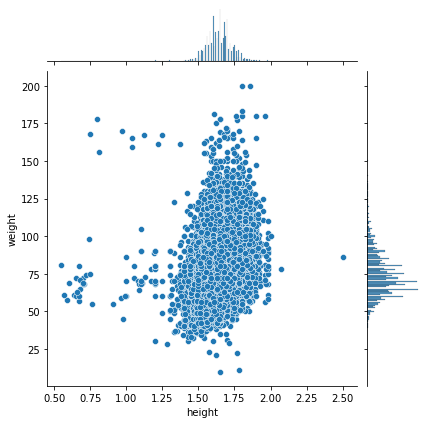

In [66]:
sns.jointplot(x='height',y='weight',data=df)

#### Distribution of height and weight for gender
Draw a catplot between height and weight with hue as "gender"

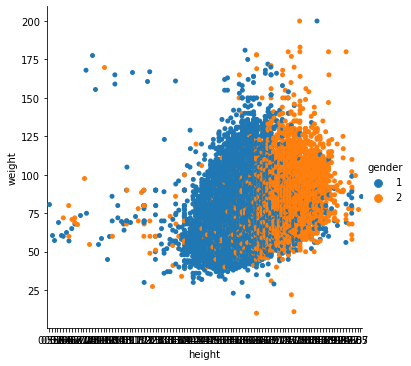

In [67]:
sns.catplot(x='height',y='weight',data=df,hue='gender')

### Find relationship between age_years and Cardio discese. Draw countplot with hue as "cardio"

<AxesSubplot:xlabel='age_years', ylabel='count'>

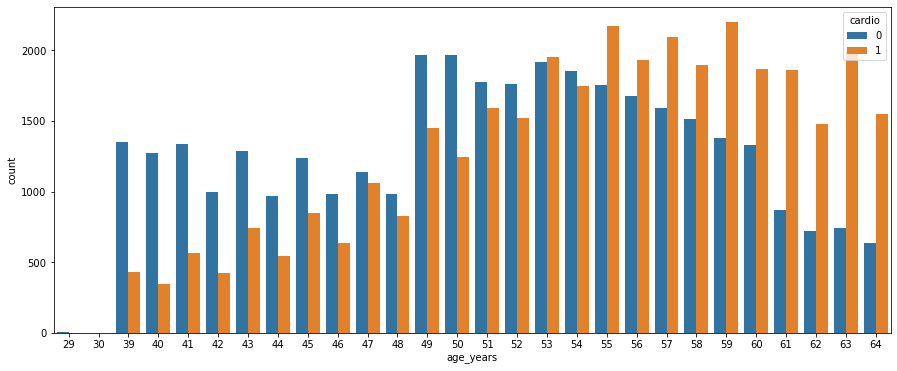

In [68]:
plt.figure(figsize = (15,6))
sns.countplot(x='age_years',hue='cardio',data=df)

From the above figure, we know critical age for cardio discese is between 50 and 60.
Note: You should use plt.rcParams to modify figure size.

### How diastilic and systolic values affect cardio patients?

#### Draw Boxen plot

for plotting a large number of quantiles, which provides more insights about the shape of the distribution

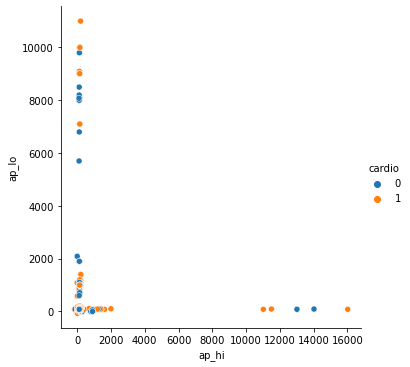

In [69]:
sns.relplot(x='ap_hi',y='ap_lo',hue='cardio',data=df)

Since, the range of ap_hi and ap_lo values very large, the plot appears too contensed.

Now, print max and min values and justify.

In [70]:
df.ap_hi.max()

16020

In [71]:
df.ap_hi.min()

-150

In [72]:
df.ap_lo.max()

11000

In [73]:
df.ap_lo.min()

-70

### How alcohol intake and age affect cardios?
#### Draw Violin Plot to represent relationship between alcohol intake and age_years with hue as "cardio"

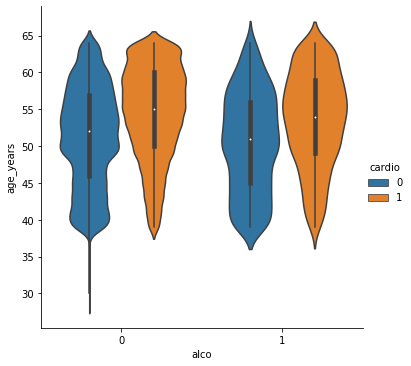

In [74]:
sns.catplot(x='alco',y='age_years',data=df,hue='cardio',kind='violin')

From this plot, we can understand the distribution of age values among alcohol consumers for cardio discese
####  1. For Non alcoholic category (ie., alco=0), what is the 50th percentile value for Non-Cardio (ie., cardio=0) people?

In [76]:
percentile_val = df.groupby(['alco','cardio'])['age_years']

In [77]:
peop =percentile_val.describe()
peop

count       mean       std   min   25%   50%   75%   max
alco cardio                                                            
0    0       33080.0  51.272642  6.781394  29.0  46.0  52.0  57.0  64.0
     1       33156.0  54.500995  6.343918  39.0  50.0  55.0  60.0  64.0
1    0        1941.0  50.526018  6.777005  39.0  45.0  51.0  56.0  64.0
     1        1823.0  53.561163  6.478578  39.0  49.0  54.0  59.0  64.0

In [78]:
peop.loc[0,0]['50%']

52.0

#### 2. For Non alcoholic category (ie., alco=0), what is the 50th percentile value for Cardio (ie., cardio=1) people?

In [79]:
peop.loc[0,1]['50%']

55.0

#### 3. For alcoholic category (ie., alco=1), what is the 25th percentile value for Non-Cardio (ie., cardio=0) people?

In [80]:
peop.loc[1,0]['25%']

45.0

#### 4. For alcoholic category (ie., alco=1), what is the 25th percentile value for Cardio (ie., cardio=1) people?

In [81]:
peop.loc[1,1]['25%']

49.0